In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [25]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [26]:
train_images[0].shape

(28, 28)

In [27]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000,28, 28, 1))

train_images, test_images = train_images/255.0, test_images/255.0

In [28]:
train_labels[0]

5

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1511 - accuracy: 0.9535
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0464 - accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0334 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0260 - accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0207 - accuracy: 0.9934
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0162 - accuracy: 0.9945
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0121 - accuracy: 0.9961
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0114 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 23s 12m

In [11]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0368 - accuracy: 0.9904


In [12]:
print(test_accuracy)

0.9904000163078308


In [13]:
from tensorflow.keras.models import Model

In [14]:
inputs = layers.Input(shape=(28, 28, 1))
conv1 = layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu)(inputs)
pool1 = layers.MaxPooling2D(padding='same')(conv1)
conv2 = layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu)(pool1)
pool2 = layers.MaxPooling2D(padding='same')(conv2)
conv3 = layers.Conv2D(128, (3, 3), padding='same', activation=tf.nn.relu)(pool2)
pool3 = layers.MaxPooling2D(padding='same')(conv3)
pool3_flat = layers.Flatten()(pool3)
dense4 = layers.Dense(256, activation = tf.nn.relu)(pool3_flat)
drop4 = layers.Dropout(rate=0.2)(dense4) #20퍼센트 정도 스킵하는 것
logits = layers.Dense(units=10, activation = 'softmax')(drop4)
model = Model(inputs=inputs, outputs=logits )

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 128)         0     

In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1250 - accuracy: 0.9596
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0448 - accuracy: 0.9859
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0311 - accuracy: 0.9905
Epoch 4/10
 728/1875 [==========>...................] - ETA: 29s - loss: 0.0227 - accuracy: 0.9927

KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

In [ ]:
class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu)
        self.pool1 = layers.MaxPooling2D(padding='same')
        self.conv2 = layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu)
        self.pool2 = layers.MaxPooling2D(padding='same')
        self.conv3 = layers.Conv2D(128, (3, 3), padding='same', activation=tf.nn.relu)
        self.conv3_flat = layers.Flatten()
        self.dense4 = layers.Dense(256, activation=tf.nn.relu)
        self.drop4 = layers.Dropout(rate=0.2)
        self.dense5 = layers.Dense(units=10, activation='softmax')

    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.conv3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)

        return net

model = MNISTModel()
model(layers.Input(shape=(28, 28, 1)))
model.summary()

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

In [ ]:
learning = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning, 
                                                          train_images.shape[0]/batch_size*5, 0.5,
                                                         staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate = lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

In [17]:
from sklearn.model_selection import train_test_split

In [29]:
valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.2, shuffle=True)

In [30]:
len(valid_images), len(test_images)

(8000, 2000)

In [32]:
learning = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning, 
                                                          train_images.shape[0]/batch_size*5, 0.5,
                                                         staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate = lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels,validation_data = (valid_images, valid_labels), epochs=20)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0123 - accuracy: 0.9963 - val_loss: 0.0236 - val_accuracy: 0.9939
Epoch 2/20
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0084 - accuracy: 0.9969 - val_loss: 0.0201 - val_accuracy: 0.9940
Epoch 3/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0235 - val_accuracy: 0.9941
Epoch 4/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0018 - accuracy: 0.9992 - val_loss: 0.0221 - val_accuracy: 0.9952
Epoch 5/20
1875/1875 [==============================] - 55s 29ms/step - loss: 6.0322e-04 - accuracy: 0.9998 - val_loss: 0.0222 - val_accuracy: 0.9954
Epoch 6/20
1875/1875 [==============================] - 53s 28ms/step - loss: 1.8998e-04 - accuracy: 0.9999 - val_loss: 0.0246 - val_accuracy: 0.9960
Epoch 7/20
1875/1875 [==============================] - 54s 29ms/step - loss: 1.2272e-04 - accuracy: 1.0000 - val_lo

In [35]:
import matplotlib.pyplot as plt

In [36]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

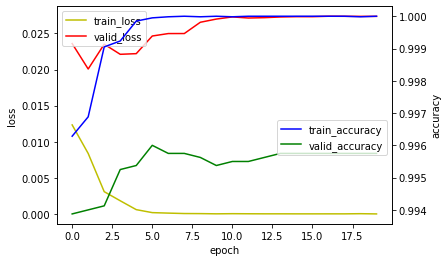

In [39]:
def display(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
    acc_ax.set_xlabel('epoch')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

    plt.show()

display(hist)

In [40]:
learning = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning, 
                                                          train_images.shape[0]/batch_size*5, 0.5,
                                                         staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate = lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels,
                 validation_data = (valid_images, valid_labels), 
                 epochs=100, 
                 batch_size = 200)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/100
300/300 [==============================] - 34s 113ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0432 - val_accuracy: 0.9929
Epoch 2/100
300/300 [==============================] - 37s 124ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.0404 - val_accuracy: 0.9942
Epoch 3/100
300/300 [==============================] - 61s 202ms/step - loss: 7.9979e-04 - accuracy: 0.9997 - val_loss: 0.0311 - val_accuracy: 0.9937
Epoch 4/100
300/300 [==============================] - 44s 146ms/step - loss: 7.4736e-04 - accuracy: 0.9998 - val_loss: 0.0404 - val_accuracy: 0.9935
Epoch 5/100
300/300 [==============================] - 53s 178ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0401 - val_accuracy: 0.9937
Epoch 6/100
300/300 [==============================] - 59s 198ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0401 - val_accuracy: 0.9929
Epoch 7/100
300/300 [==============================] - 55s 185ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 

KeyboardInterrupt: 

In [41]:
!nvidia-smi

'nvidia-smi'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
